# I. Импорт модулей

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math as mt
import json

%matplotlib inline
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

# II. Считаем данные

In [2]:
df = pd.read_csv('USvideos_1.csv', on_bad_lines='warn') 

In [3]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### будем решать задачу предсказания числа просмотров видео, соответственно, необходимо выкинуть некоторые признаки, которые недоступны для только что вышедшего видео, а также явно не особо полезную фичу 'thumbnail_link', содержащую ссылки на иконки предпросмотра видео. Возможно, что имеет смысл также выкинуть колонки comments_disabled, ratings_disabled, video_error_or_removed

In [4]:
df = df.drop(columns=['likes', 'dislikes', 
                      'comment_count', 'thumbnail_link'])
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.shape

(40949, 12)

# III. EDA

#### Взглянем на типы имеющихся колонок и на количество пропусков

In [6]:
def check_nan_and_types(df):
    tab_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'тип колонки'})
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'количество пропусков'}))
    tab_info = tab_info.append(pd.DataFrame(df.isnull().sum() / df.shape[0] * 100)
                             .T.rename(index={0:'количество пропусков, в %'}))
    display(tab_info)

check_nan_and_types(df)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description
тип колонки,object,object,object,object,int64,object,object,int64,bool,bool,bool,object
количество пропусков,0,0,0,0,0,0,0,0,0,0,0,570
"количество пропусков, в %",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.391975


#### Явно есть проблема с колонками дат: pandas не смог их самостоятельно автоматически распарсить. Присутствует небольшое количество видео без описаний

In [7]:
df['trending_date'] = pd.to_datetime(df.trending_date, yearfirst=True, format='%y.%d.%m')
df['publish_time'] = df['publish_time'].astype('datetime64[s]')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,False,False,False,I know it's been a while since we did this sho...


In [8]:
print('Выборка содержит видео, попавшие в тренды между %s и %s' %
      (df['trending_date'].dt.date.min(), df['trending_date'].dt.date.max()))
print('Выборка содержит видео, опубликованные между %s и %s' %
      (df['publish_time'].dt.date.min(), df['publish_time'].dt.date.max()))

Выборка содержит видео, попавшие в тренды между 2017-11-14 и 2018-06-14
Выборка содержит видео, опубликованные между 2006-07-23 и 2018-06-14


#### подтянем информацию о категориях (точнее, сами названия категорий)

In [9]:
with open('US_category_id.json') as json_data:
    data = json.load(json_data)

In [10]:
categ_dict = {'category_id': [], 'category_name': []}
for d in data['items']:
    categ_dict['category_id'].append(int(d['id']))
    categ_dict['category_name'].append(d['snippet']['title'])

In [11]:
categories_df = pd.DataFrame(categ_dict)
categories_df.head()

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [12]:
sorted(df.category_id.unique())

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]

In [13]:
categories_df.category_id.unique()

array([ 1,  2, 10, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
      dtype=int64)

In [14]:
set(sorted(df.category_id.unique())).issubset(set(categories_df.category_id.unique()))

True

То есть в нашем датафрейме нет категорий, для которых у нас бы не было названия, теперь заджойним названия категорий к нашему датасету

In [15]:
df = df.merge(categories_df, on='category_id')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute|""cats""|""thai""|""eggs""",98966,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33,wearing online dollar store makeup for a week|...,2744430,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


посмотрим, дублируются ли у нас в выборке видео

In [16]:
df['video_id'].duplicated().sum()

34598

In [17]:
print('Уникальных видео: %d. Доля уникальных видео: %.4f' %(df['video_id'].nunique(), 
                                                           df['video_id'].nunique() / df.shape[0]))

Уникальных видео: 6351. Доля уникальных видео: 0.1551


In [18]:
video_id_df = df['video_id'].value_counts()  
video_id_df = video_id_df.to_frame(name='count').reset_index().rename(columns={'index': 'video_id'})
video_id_df[:30] # некоторые видео успели побывать в трендах больше 20 раз

,video_id,count
0,j4KvrAUjn6c,30
1,iILJvqrAQ_w,29
2,t4pRQ0jn23Q,29
3,MAjY8mCTXWk,29
4,NBSAQenU2Bk,29
5,8h--kFui1JA,29
6,r-3iathMo7o,29
7,QBL8IRJ5yHU,29
8,6S9c5nnDd_s,28
9,2PH7dK6SLC8,28


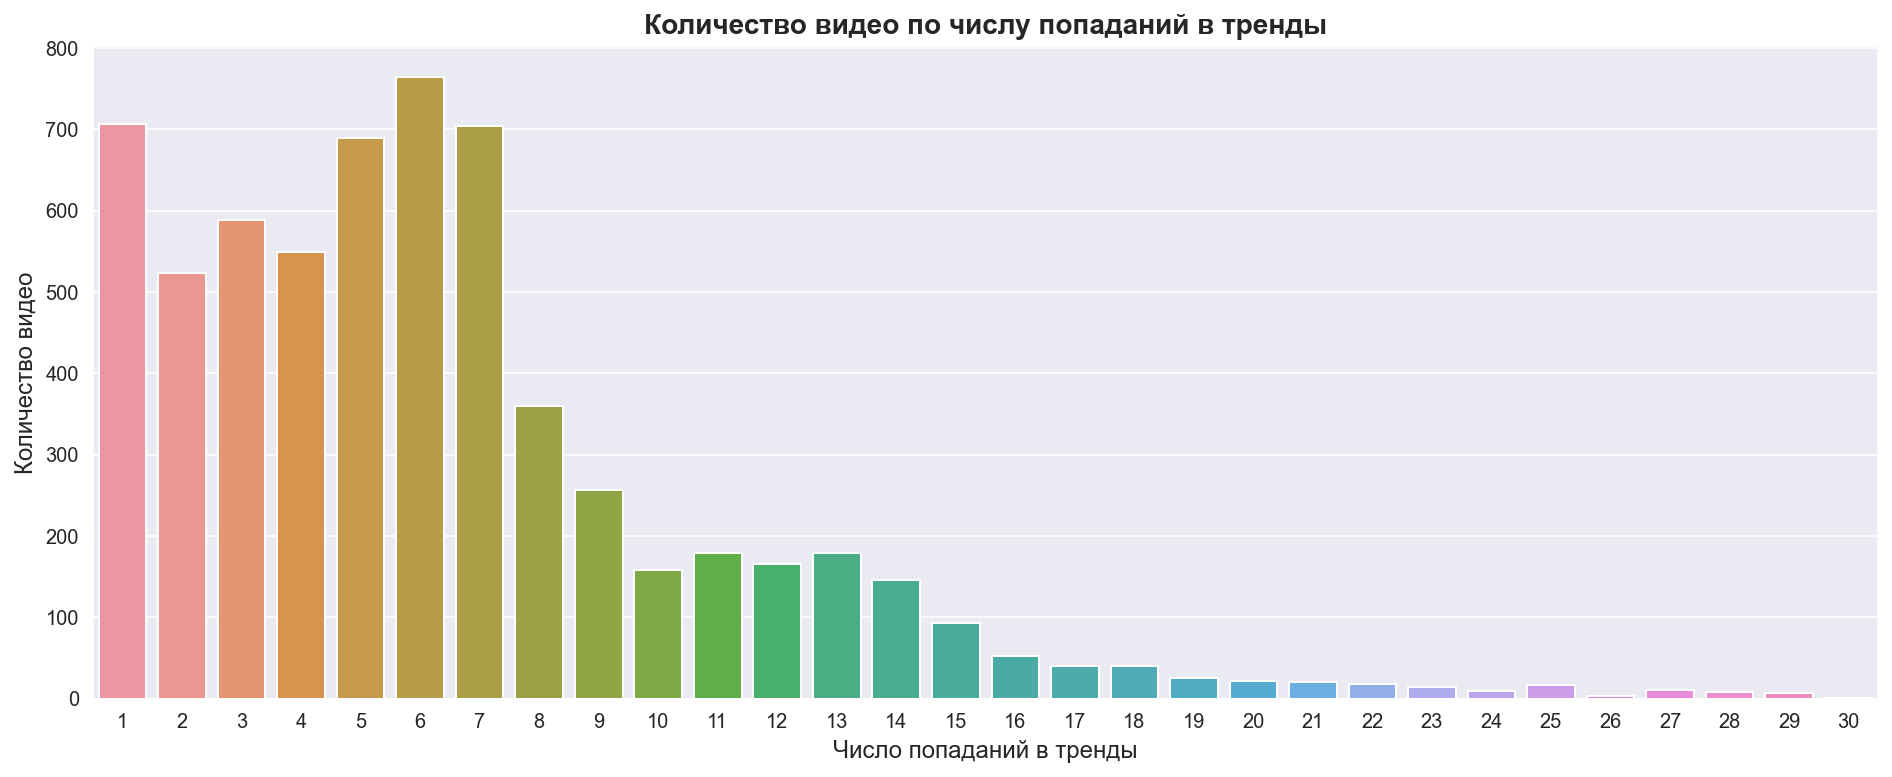

In [19]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=video_id_df.groupby('count', as_index=False) \
                                 .agg({'video_id': 'count'}),
                 x='count', y='video_id')
ax.set_title('Количество видео по числу попаданий в тренды', weight='bold', fontsize=14)
ax.set_xlabel('Число попаданий в тренды', fontsize=12)
ax.set_ylabel('Количество видео', fontsize=12)
plt.show()

Очевидно, дублируются, т.е. видимо, какие-то видео попадали в тренды несколько раз. Значит video_id не делает строчку уникальной, тогда проверим: возможно, комбинация id и даты попадания в тренды (video_id и trending_date) делает строчку уникальной

In [20]:
df_id_trend_date = df[['video_id', 'trending_date']]
print('Количество дублирующихся пар video_id-trending_date:', df_id_trend_date.duplicated().sum())
print('Количество видео, попавших в тренды 2018-05-15:', 
      df_id_trend_date[df_id_trend_date['trending_date'] == '2018-05-15'].shape[0], 
      '\nКоличество дублирующихся пар video_id-trending_date в этот день:',
      df_id_trend_date[df_id_trend_date['trending_date'] == '2018-05-15'].duplicated().sum())

Количество дублирующихся пар video_id-trending_date: 50
Количество видео, попавших в тренды 2018-05-15: 199 
Количество дублирующихся пар video_id-trending_date в этот день: 50


Видимо, пара video_id и trending_date тоже не делает строчку уникальной из-за того, что 15 мая 2018 года 50 видео продублировались в трендах (все 50 дублирующиеся пары из исходной выборки принадлежат именно этой дате)

довольно немного уникальных видео, оставим только последнее по дате появления в трендах наблюдение для каждого видео

In [21]:
df = df.sort_values('trending_date')
df = df.drop_duplicates('video_id', keep='last')
df.shape

(6351, 13)

In [22]:
print('Выборка содержит видео, попавшие в тренды между %s и %s' %
      (df['trending_date'].dt.date.min(), df['trending_date'].dt.date.max()))
print('Выборка содержит видео, опубликованные между %s и %s' %
      (df['publish_time'].dt.date.min(), df['publish_time'].dt.date.max()))

Выборка содержит видео, попавшие в тренды между 2017-11-14 и 2018-06-14
Выборка содержит видео, опубликованные между 2006-07-23 и 2018-06-14


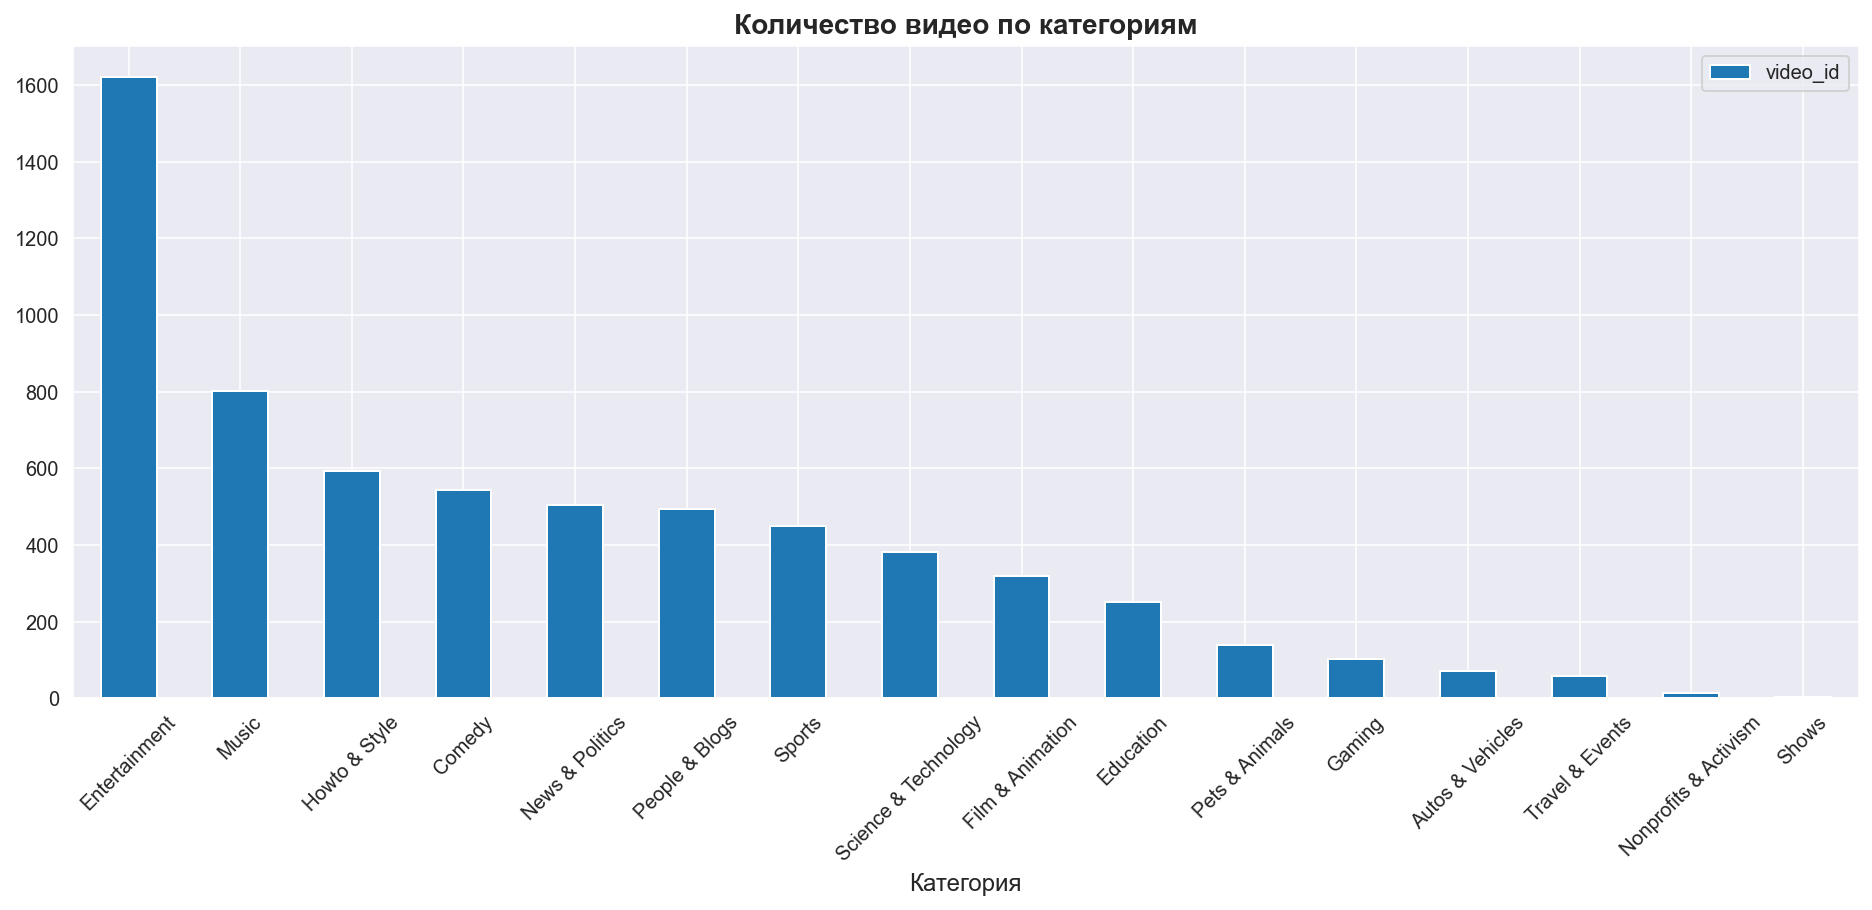

In [144]:
df.groupby('category_name').agg({'video_id': 'count'}) \
                           .sort_values('video_id', ascending=False) \
                           .plot(kind='bar', figsize=(16, 6))
plt.title('Количество видео по категориям', weight='bold', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=45)
plt.show()

возможно, будет чуть нагляднее, если воспользоваться pie-chart'ом

In [146]:
df_categories = df.groupby('category_name', as_index=False).agg({'video_id': 'count'}) \
                           .sort_values('video_id', ascending=False) 
fig = px.pie(df_categories, values='video_id', names='category_name', 
             title='Доли видео различных категорий') #, hole=0.1)
fig.show()

Можно сделать вполне закономерный вывод о том, какие категории являются популярными на youtube

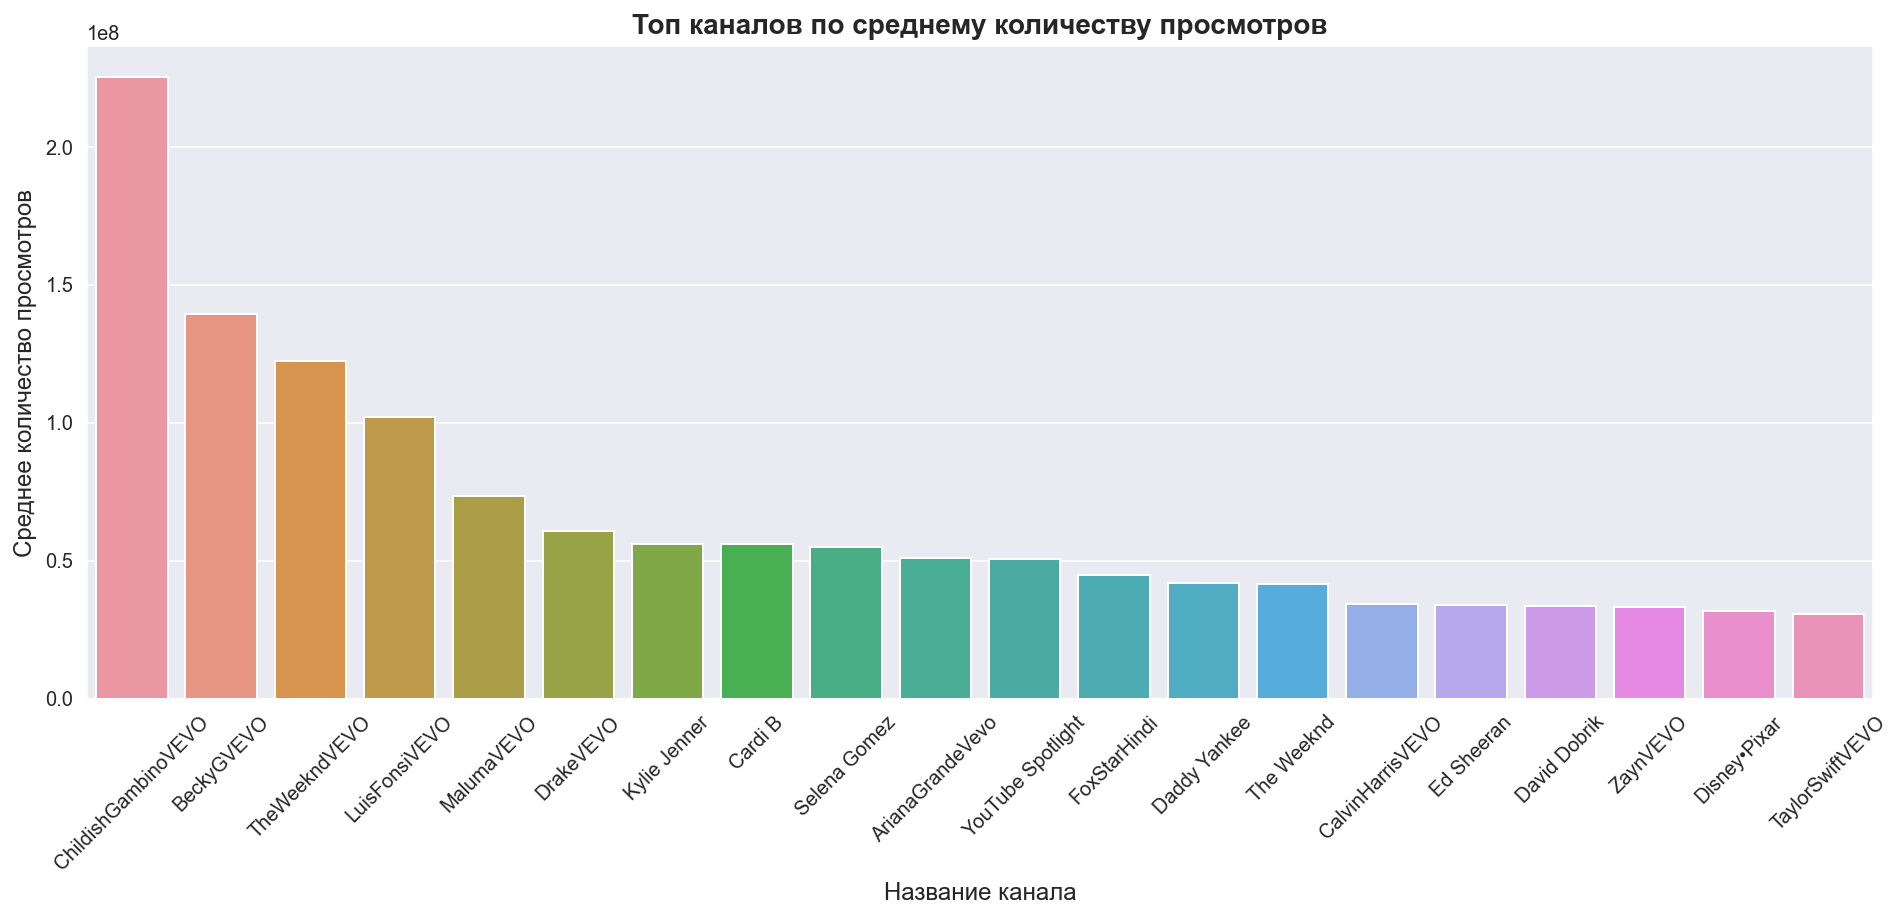

In [147]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=df.groupby('channel_title', as_index=False).agg({'views': 'mean'}) \
                           .sort_values('views', ascending=False).iloc[:20], 
            x='channel_title', y='views')
ax.set_title('Топ каналов по среднему количеству просмотров', weight='bold', fontsize=14)
ax.set_xlabel('Название канала', fontsize=12)
ax.set_ylabel('Среднее количество просмотров', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [148]:
df = df.copy()
df['weekday_published'] = df['publish_time'].dt.weekday
df['month_published'] = df['publish_time'].dt.month
df['year_published'] = df['publish_time'].dt.year
df['hour_published'] = df['publish_time'].dt.hour
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,weekday_published,month_published,year_published,hour_published
35098,q-WipZ9p0wk,2017-11-14,Three meals that cost me $1.50 each,Brothers Green Eats,26,2017-11-09 14:00:08,"brothers green eats|""budget cooking""|""cooking ...",77630,False,False,False,Welcome to day three of cooking for the price ...,Howto & Style,3,11,2017,14
35099,6V_aZsATDsM,2017-11-14,"Chapter 28: I Love My Baby But, I Miss My Dad",Whitney Port,26,2017-11-09 17:22:40,"Whitney Port|""I Love My Baby But""|""Grief""|""Gri...",55398,False,False,False,***We are having technical difficulties with t...,Howto & Style,3,11,2017,17
35100,BEweWXa5Twk,2017-11-14,FACE SURGERY WITH MAKEUP,Christen Dominique,26,2017-11-09 03:27:36,"makeup|""makeup tutorial""|""surgery""|""transforma...",471266,False,False,False,S N A P C H A T: ChristenSnaps\nT W I T T E R ...,Howto & Style,3,11,2017,3
35101,CR9zYgr84QY,2017-11-14,Chocolate Orange Autumn Cupcakes | Cupcake Jemma,CupcakeJemma,26,2017-11-09 18:30:01,"cupcakes|""cupcake""|""cup cake""|""cake""|""cakes""|""...",122669,False,False,False,"These cupcakes are for life, not just for Autu...",Howto & Style,3,11,2017,18
35102,510KQ_LXGww,2017-11-14,My Every Day Autumn Makeup | Zoella,Zoella,26,2017-11-08 18:24:16,"zoe sugg|""zoe""|""sugg""|""zoella""|""beauty""|""cosme...",1390440,False,False,False,My Every Day Autumn Makeup\n⇢ Previous Video: ...,Howto & Style,2,11,2017,18


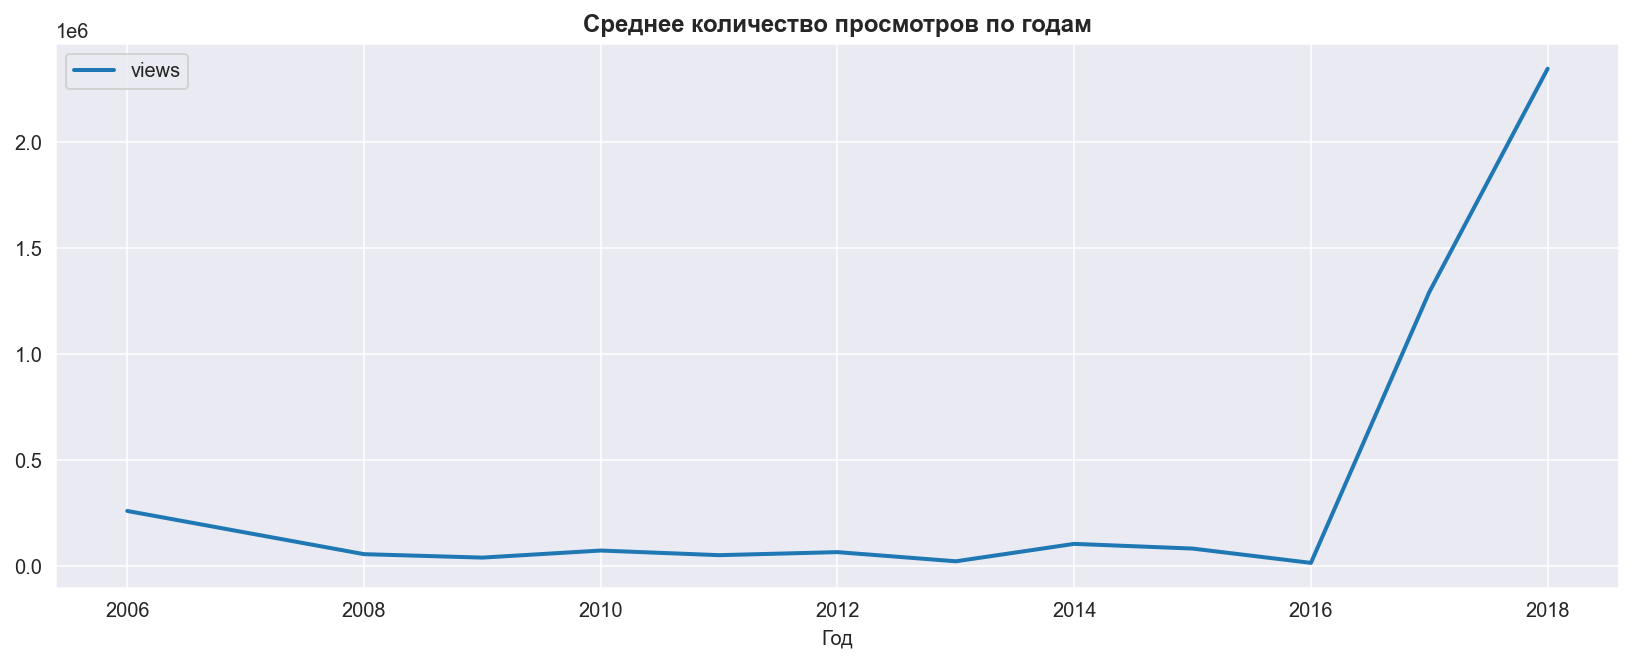

In [149]:
df.groupby(['year_published']).agg({'views': 'mean'}).plot(kind='line', figsize=(14, 5), linewidth=2)
plt.xlabel('Год')
plt.title('Среднее количество просмотров по годам', weight='bold', fontsize=12)
plt.show()

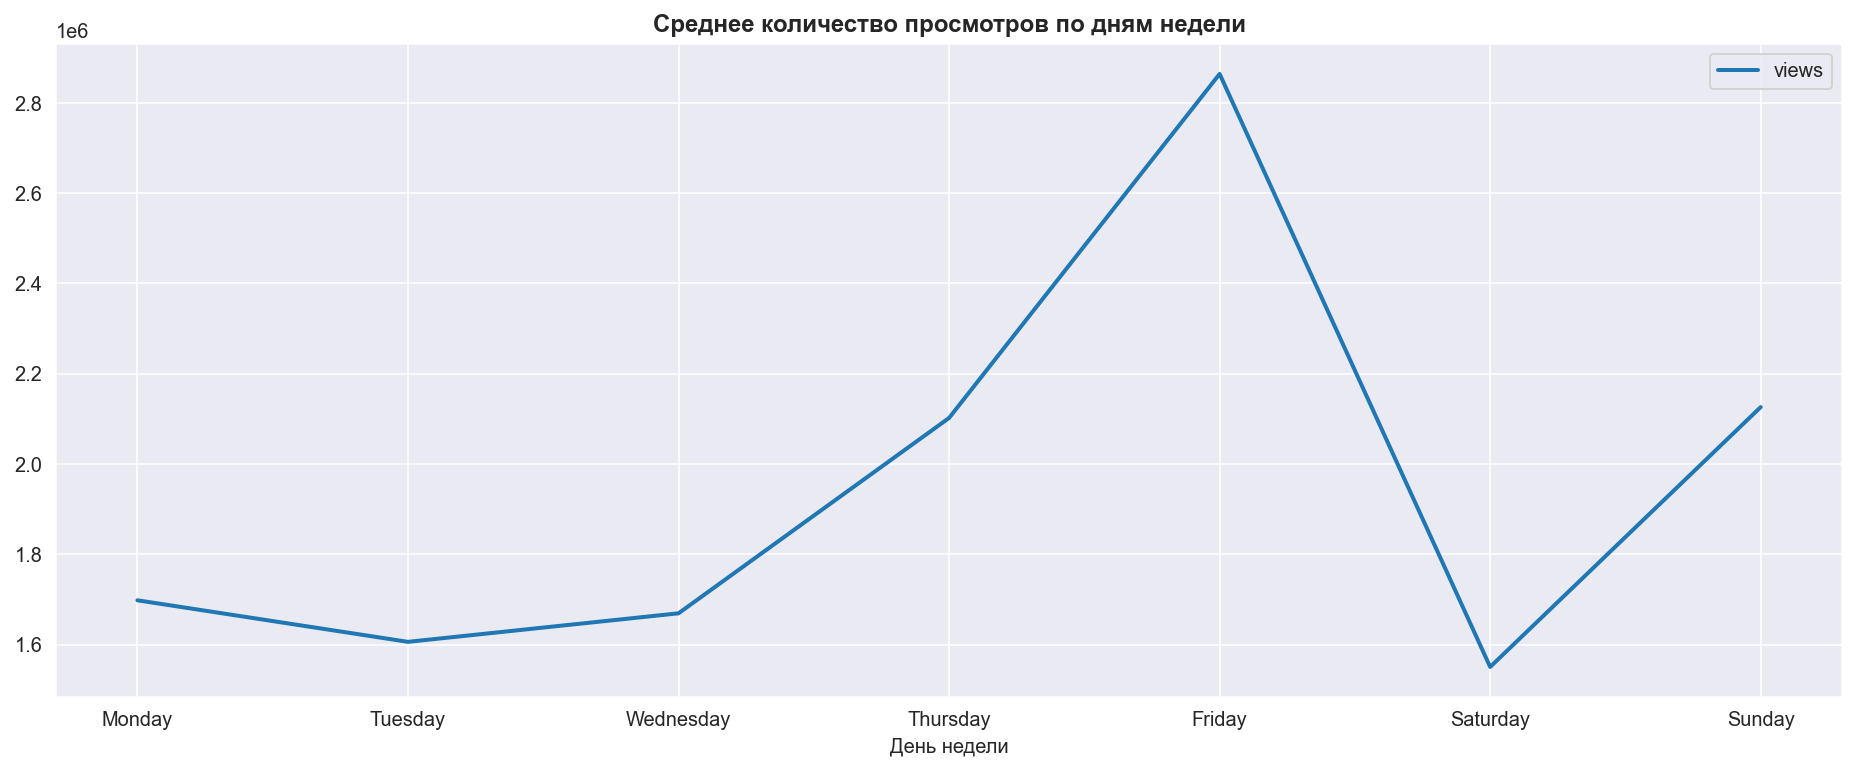

In [150]:
df.groupby(['weekday_published']).agg({'views': 'mean'}).plot(kind='line', figsize=(16, 6), linewidth=2)
plt.xlabel('День недели')
plt.title('Среднее количество просмотров по дням недели', weight='bold', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 
                                   'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

#### это не совсем то, что можно было бы ожидать. Кажется, что пик среднего числа просмотров должен приходится на какой-то из выходных дней, но возможно, что это связано с тем, что мы анализируем данные по США, а время публикации указано по UTC+0

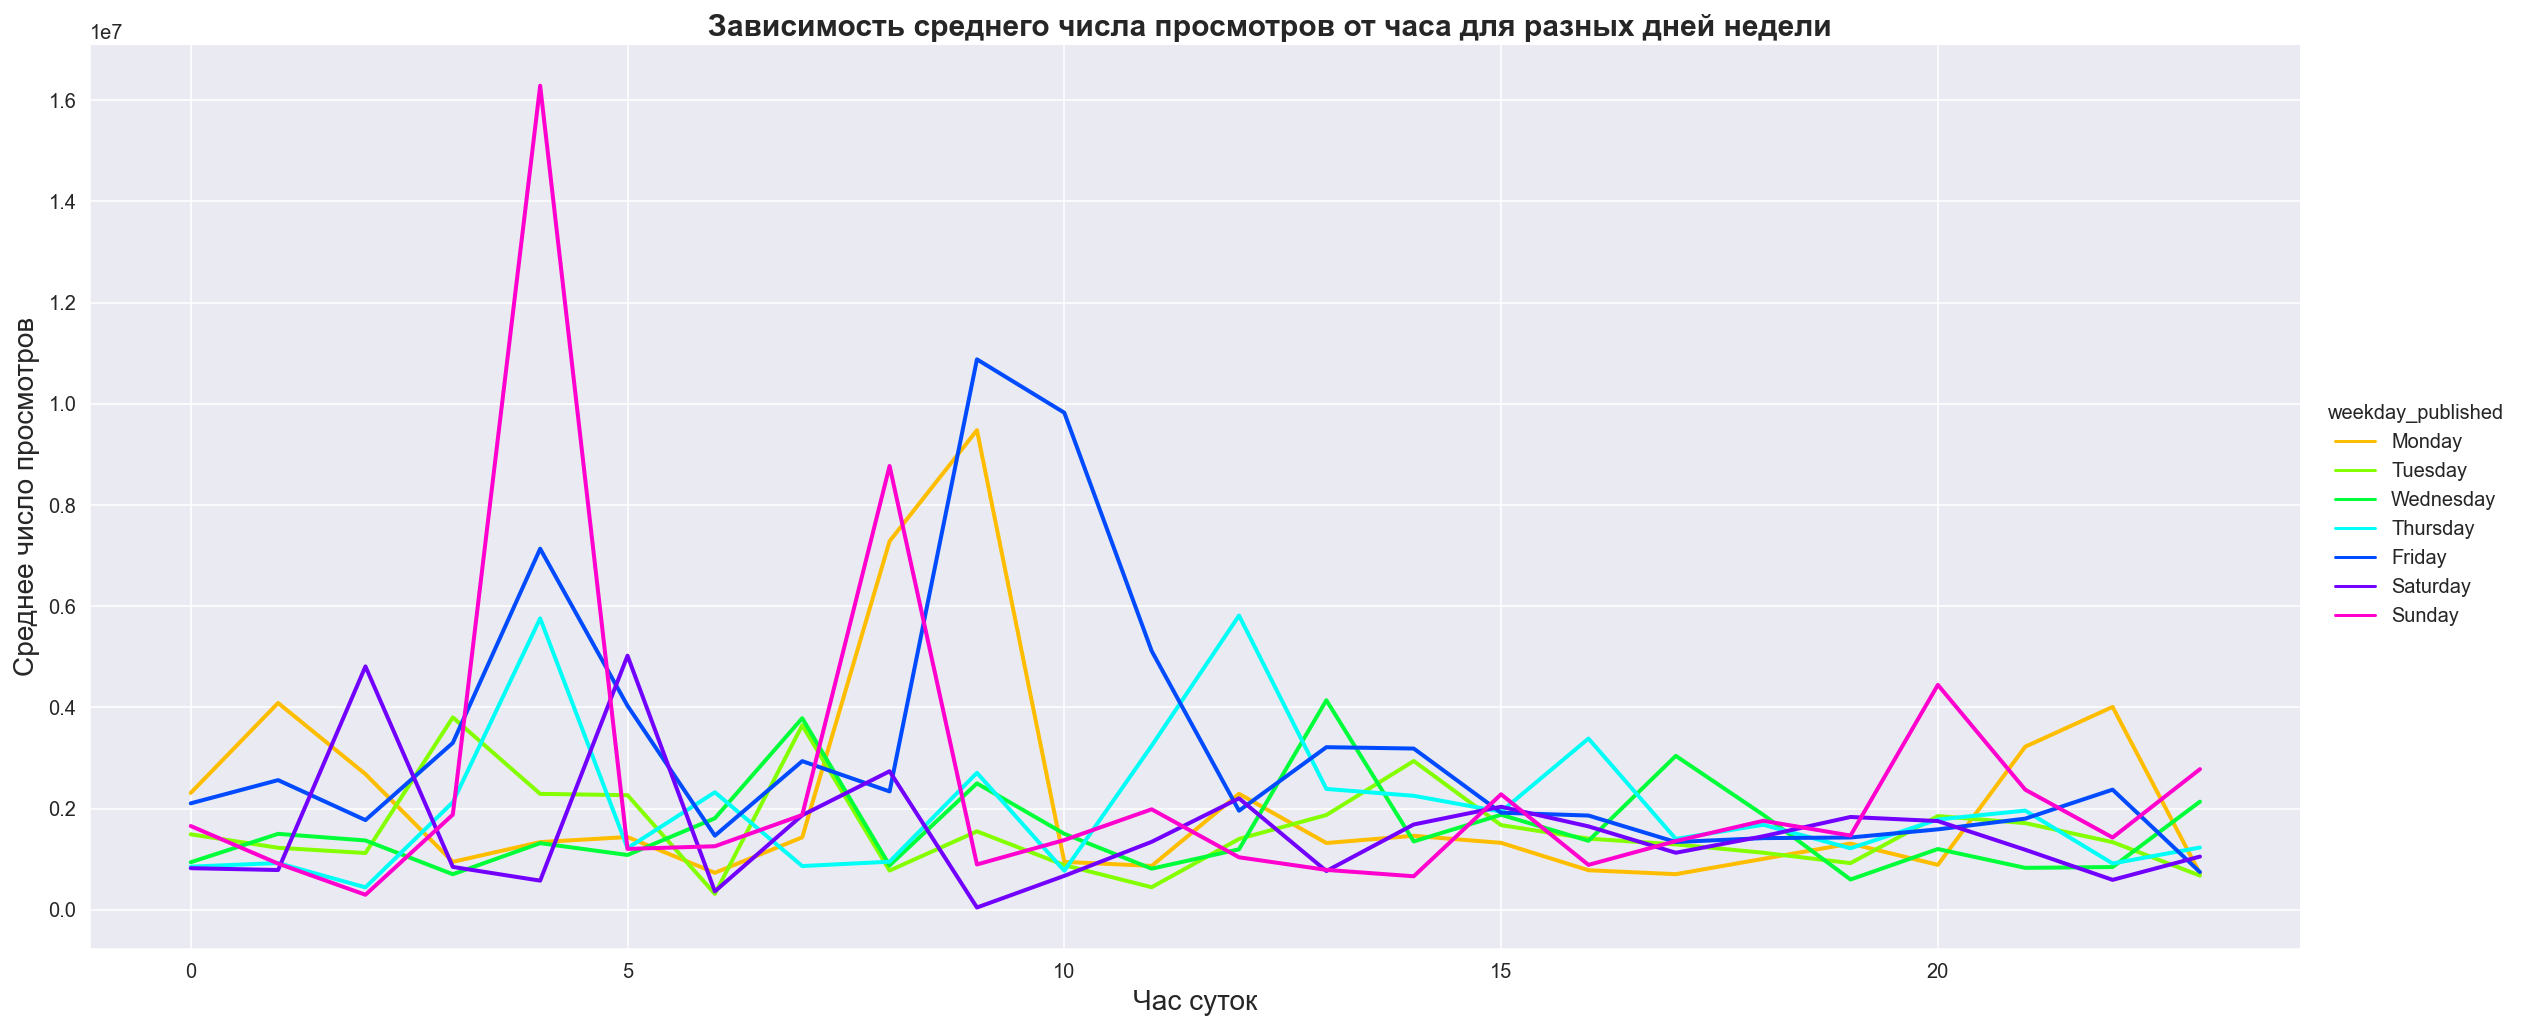

In [151]:
df_plt = df.groupby(['weekday_published', 'hour_published'], as_index=False).agg({'views': 'mean'})
days_map = dict(zip(range(7), ['Monday', 'Tuesday', 'Wednesday', 
                          'Thursday', 'Friday', 'Saturday', 'Sunday']))
df_plt['weekday_published'] = df_plt.weekday_published.apply(lambda x: days_map[x])

ax = sns.relplot(x='hour_published', y='views', data=df_plt, 
                 hue='weekday_published', kind='line', linewidth=2,
                 palette='hsv', height=7, aspect=16/7)
ax.set_axis_labels('Час суток', 'Среднее число просмотров', fontsize=14)
ax.fig.suptitle('Зависимость среднего числа просмотров от часа для разных дней недели',
                weight='bold', fontsize=15)
plt.subplots_adjust(top=0.95)
plt.show()

In [152]:
df.channel_title.nunique()  # количество различных каналов в выборке

2198

In [153]:
# посмотрим сколько в выборке видео, где отключены комментарии или 
# лайки/дислайки или видео удалено/не найдено
df[['comments_disabled', 'ratings_disabled', 'video_error_or_removed']].sum()  

comments_disabled         105
ratings_disabled           30
video_error_or_removed      4
dtype: int64

In [154]:
df[(df['comments_disabled'] == True) | (df['ratings_disabled'] == True) | 
   (df['video_error_or_removed'] == True)].views.mean()

2094978.6097560977

#### Проанализируем сам таргет

In [155]:
df.views.describe()

count    6.351000e+03
mean     1.962117e+06
std      7.060057e+06
min      5.590000e+02
25%      1.591565e+05
50%      5.181070e+05
75%      1.473582e+06
max      2.252119e+08
Name: views, dtype: float64

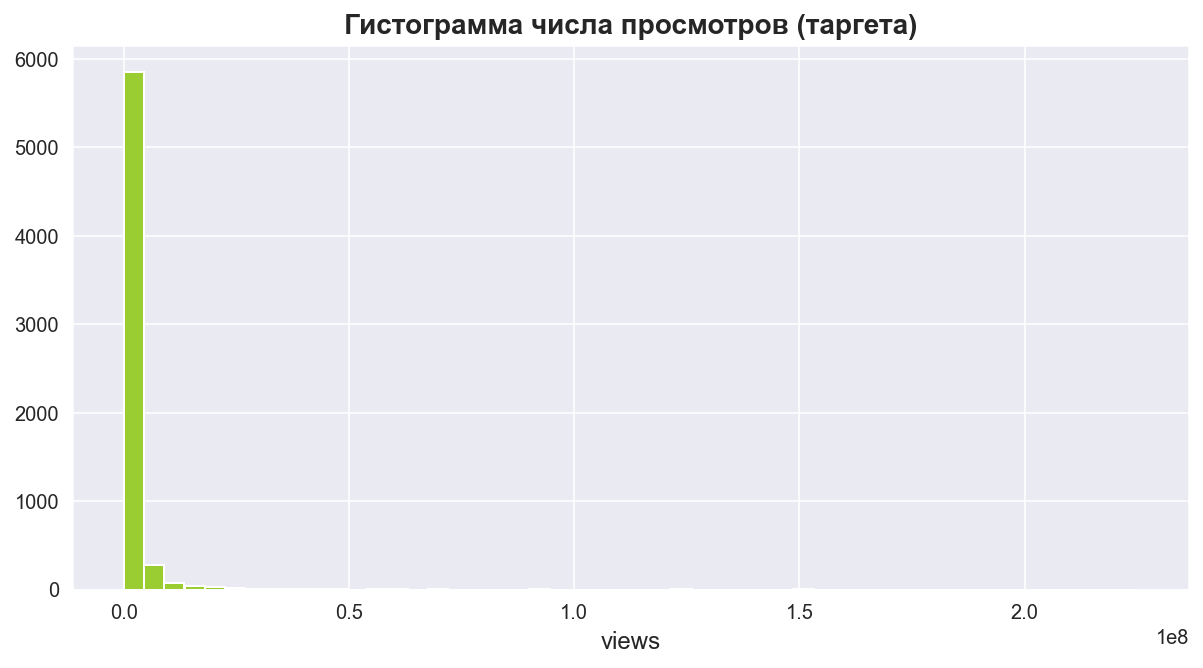

In [156]:
df['views'].hist(bins=50, figsize=(10, 5), color='yellowgreen')
plt.xlabel('views', fontsize=12)
plt.title('Гистограмма числа просмотров (таргета)', weight='bold', fontsize=14)
plt.show()

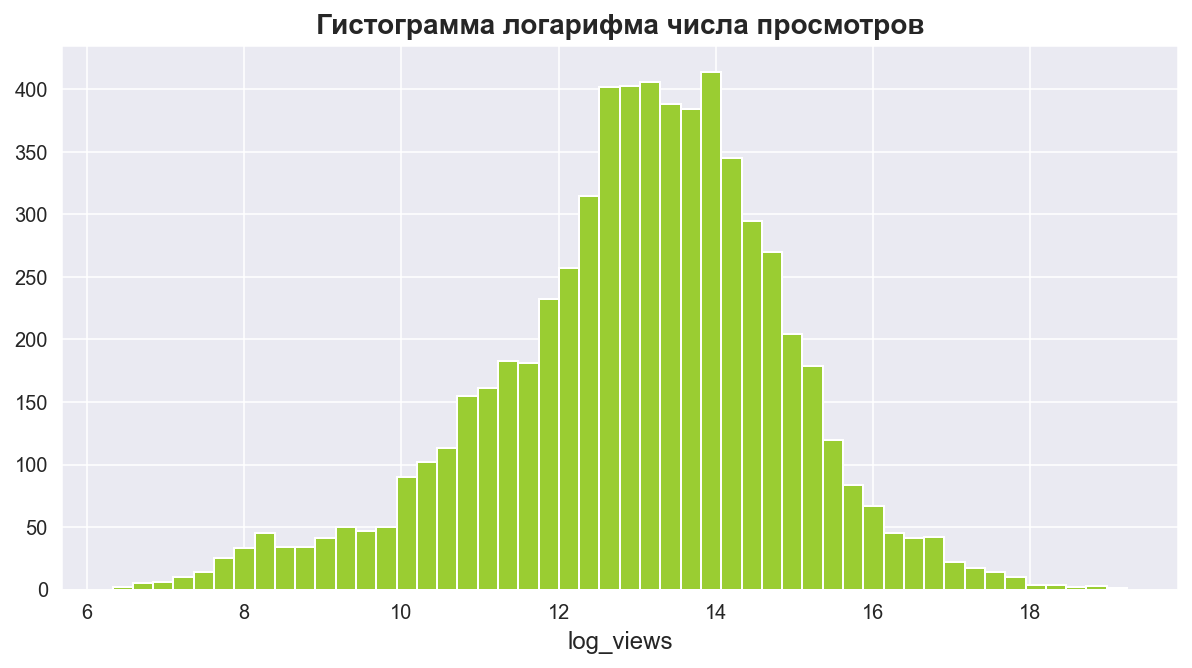

In [157]:
np.log(df['views']).hist(bins=50, figsize=(10, 5), color='yellowgreen')
plt.xlabel('log_views', fontsize=12)
plt.title('Гистограмма логарифма числа просмотров', weight='bold', fontsize=14)
plt.show()

In [158]:
df[df['tags'] == '[none]'].shape[0], df[df['tags'] == '[none]'].views.mean()

(258, 1297531.445736434)

Преобразуем пару имеющихся фичей и добавим ещё парочку новых фичей:
1) фичи comments_disabled, ratings_disabled, где лежит bool просто преобразуем в int, чтобы получить столбцы 0 и 1  
2) добавим признаки no_tags, no_description: отсутствие тэгов и описания к видео, соответственно. (no_description достаточно ощутимо снизила RMSE)  
3) прологарифмируем наш таргет, по причинам понятным из графиков выше 

In [159]:
df['comments_disabled'] = df['comments_disabled'].astype(int)
df['ratings_disabled'] = df['ratings_disabled'].astype(int)
df['no_tags'] = df['tags'].apply(lambda x: x == '[none]').astype(int)
df['no_description'] = df['description'].isna().astype(int)  
df['log_views'] = np.log(df['views'])

In [160]:
df[(df['video_error_or_removed'] == True)]  # скорее всего, эту надо выкидывать

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,weekday_published,month_published,year_published,hour_published,no_tags,no_description,log_views
3718,RK_B4Ez4_5Q,2017-11-25,Verizon 360 Live: The Macy’s Thanksgiving Day ...,Verizon,24,2017-11-23 19:51:07,"live stream|""360 video""|""fun videos for kids""|...",2618344,0,0,True,"This year, we hid special offers throughout th...",Entertainment,3,11,2017,19,0,0,14.778053
24705,kZete48ZtsY,2018-02-03,Deleted video,DaHoopSpot Productions,17,2017-12-16 04:29:25,[none],2620,0,0,True,NaN,Sports,5,12,2017,4,1,1,7.870930
20864,q8v9MvManKE,2018-05-04,Earth Day 2018 Google Doodle,googledoodles,1,2018-04-21 15:00:50,[none],1233955,0,0,True,Today’s annual Earth Day Doodle was created in...,Film & Animation,5,4,2018,15,1,0,14.025735
11498,1Aoc-cd9eYs,2018-05-14,Cobra Kai Ep 2 - Strike First - The Karate Kid...,Cobra Kai,24,2018-05-02 16:02:35,"Cobra Kai|""Karate Kid""|""YouTube Red Original S...",1062499,0,0,True,Present day Daniel LaRusso lives a charmed lif...,Entertainment,2,5,2018,16,0,0,13.876134


In [161]:
# (df['trending_date'] - df['publish_time']).dt.days.plot(kind='hist', bins=100)

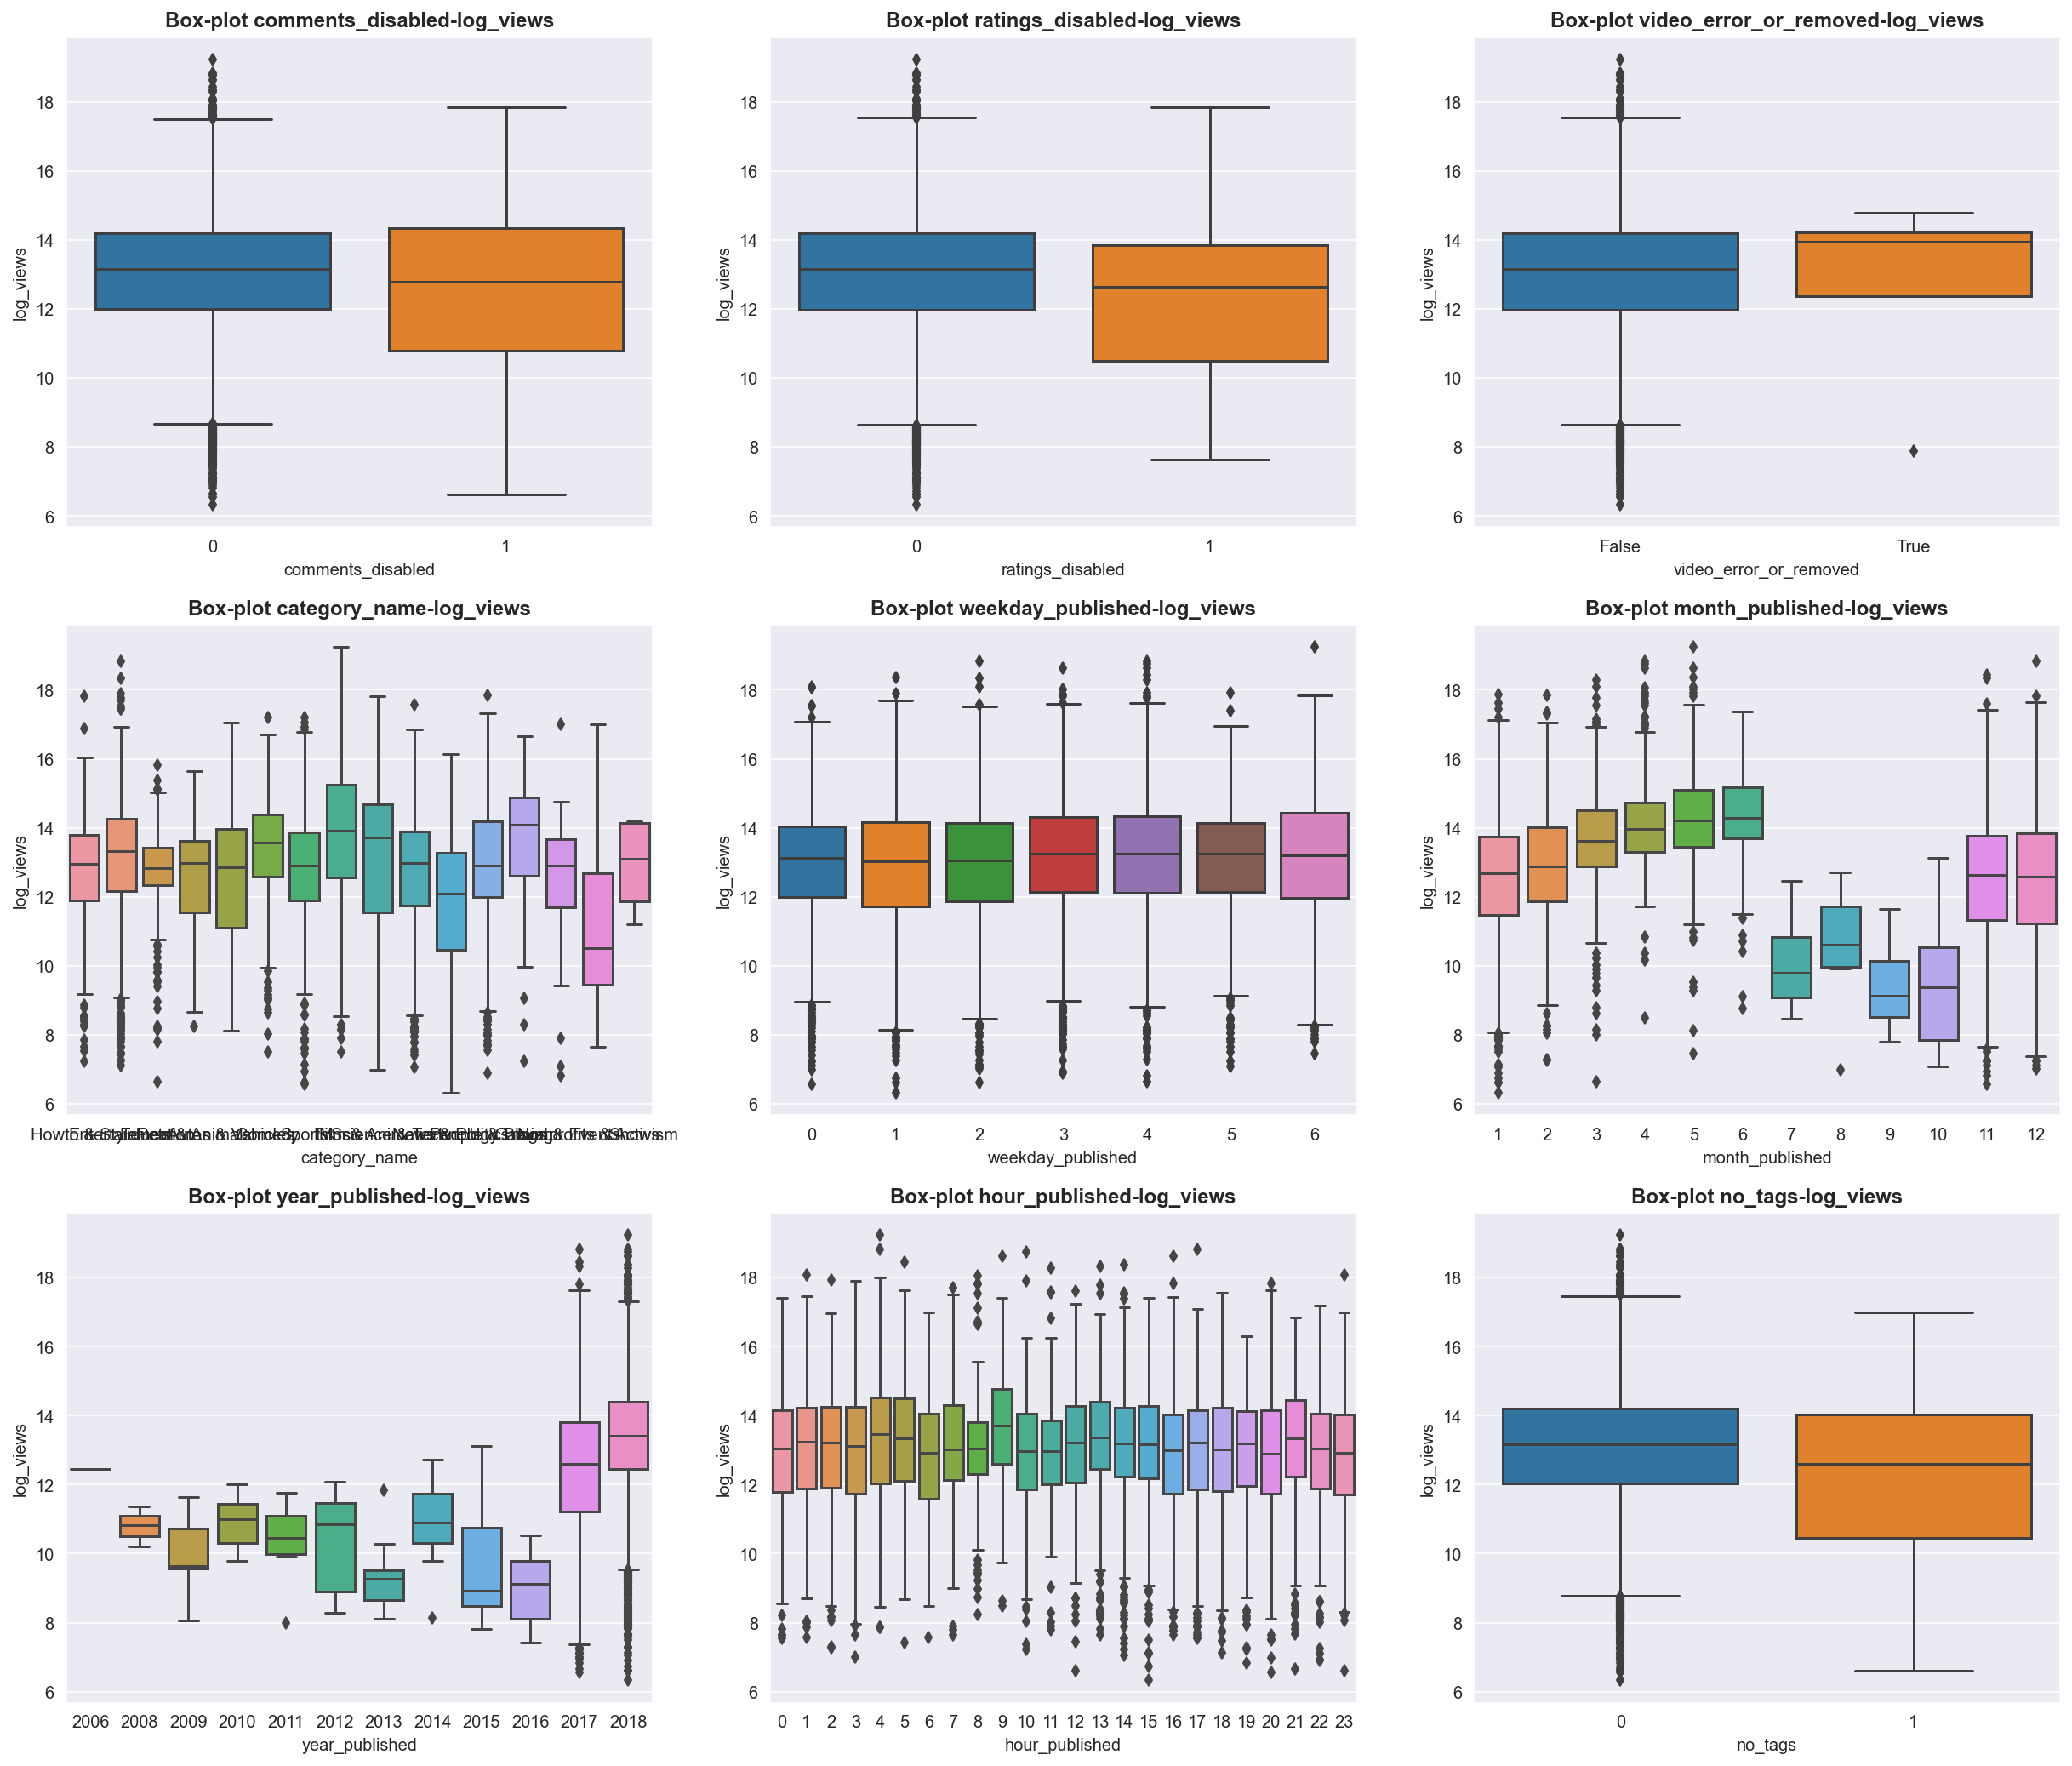

In [162]:
def box_plt(df, col_name, ax, target='log_views'):
    sns.boxplot(x=col_name, y=target, data=df, ax=ax)
    ax.set_title(f'Box-plot {col_name}-{target}', 
                 fontsize=12, weight='bold')

lst_plt = [
    'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
    'category_name', 'weekday_published', 'month_published', 
    'year_published', 'hour_published', 'no_tags'
]

num_rows, num_cols = mt.ceil(len(lst_plt) / 3), 3
fig, axs = plt.subplots(num_rows, num_cols, figsize=(21, 18))
col_l = np.array(lst_plt).reshape(num_rows, num_cols)

for i in range(num_rows):
    for j in range(num_cols):
        box_plt(df, col_l[i][j], axs[i][j])

# fig.subplots_adjust(bottom=0.05, top=0.97, hspace=0.25)
plt.show()

# IV. ML-часть

In [163]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

#### Как работает tf-idf

In [164]:
tfidf_vect = TfidfVectorizer()
corpus = df['title']
tfidf_vect.fit_transform(corpus)

<6351x10273 sparse matrix of type '<class 'numpy.float64'>'
	with 49066 stored elements in Compressed Sparse Row format>

In [165]:
df_idf = pd.DataFrame(tfidf_vect.fit_transform(corpus)[0].T.todense(),
                  index=tfidf_vect.get_feature_names(), columns=["TF-IDF"])
df_idf = df_idf.sort_values('TF-IDF', ascending=False)
df_idf.head(25)

,TF-IDF
meals,0.469619
cost,0.448610
each,0.397789
three,0.376779
50,0.368792
that,0.275952
me,0.256614
period,0.000000
performs,0.000000
perfume,0.000000


In [166]:
# corpus = df['title']
# pipe = Pipeline([('count', CountVectorizer()),
#                  ('tfid', TfidfTransformer())]).fit(corpus)
# pipe.transform(corpus)

#### разобъём выборку на обучающую и тестовую и обучим обычную линейную регрессию без текстовых признаков.

In [167]:
categoric = [
    'comments_disabled', 'ratings_disabled', 'category_name',
    'weekday_published', 'month_published', 'year_published', 
    'hour_published', 'no_tags', 'no_description'
]

numeric = []

text = 'title'

X, y = df[categoric + numeric + [text]], df['log_views']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [169]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categoric),
    ('scaling', StandardScaler(), numeric)
])

X_train_transf = column_transformer.fit_transform(X_train)
X_test_transf = column_transformer.transform(X_test)
print("Количество признаков до трансформации:", X_train.shape[1])
print("Количество признаков после трансформации:", column_transformer.transform(X_train).shape[1])

Количество признаков до трансформации: 10
Количество признаков после трансформации: 79


In [170]:
lr = LinearRegression()
lr.fit(X_train_transf, y_train)
y_pred = lr.predict(X_test_transf)
print('RMSE на трейне: %.5f' % mean_squared_error(y_train, lr.predict(X_train_transf), squared=False))
print('RMSE на тестовой части: %.5f' % mean_squared_error(y_test, y_pred, squared=False))

RMSE на трейне: 1.56935
RMSE на тестовой части: 1.63709


#### теперь попробуем добавить tf-idf на названии видео в нашу модель

In [171]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categoric),
    ('scaling', StandardScaler(), numeric),
#     ('text', Pipeline([('count', CountVectorizer()),
#                        ('tfidf', TfidfTransformer())]), text)
     ('tfidf', TfidfVectorizer(), text)
])

X_train_transf = column_transformer.fit_transform(X_train)
X_test_transf = column_transformer.transform(X_test)
print("Количество признаков до трансформации:", X_train.shape[1])
print("Количество признаков после трансформации:", column_transformer.transform(X_train).shape[1])

Количество признаков до трансформации: 10
Количество признаков после трансформации: 8849


In [172]:
lr = LinearRegression()
lr.fit(X_train_transf, y_train)
y_pred = lr.predict(X_test_transf)
print('RMSE на трейне: %.5f' % mean_squared_error(y_train, lr.predict(X_train_transf), squared=False))
print('RMSE на тестовой части: %.5f' % mean_squared_error(y_test, y_pred, squared=False))

RMSE на трейне: 0.00871
RMSE на тестовой части: 7.41996


In [173]:
ridge = Ridge()
ridge.fit(X_train_transf, y_train)
y_pred = ridge.predict(X_test_transf)
print('RMSE на трейне: %.5f' % mean_squared_error(y_train, ridge.predict(X_train_transf), squared=False))
print('RMSE на тестовой части: %.5f' % mean_squared_error(y_test, y_pred, squared=False))

RMSE на трейне: 0.91299
RMSE на тестовой части: 1.52958


#### подтянуть инфу о длительности видео (может быть неплохой фичей)?

In [178]:
cv_scores = -cross_val_score(Ridge(), X_train_transf, y_train, 
                             scoring='neg_root_mean_squared_error', cv=10)
print('CV-scores:', cv_scores)
print('Результаты CV для Ridge на 10 фолдах: %.5f' % cv_scores.mean())

CV-scores: [1.43552938 1.4263243  1.56435248 1.61485876 1.57416094 1.47653924
 1.49827251 1.53484355 1.50337117 1.38974699]
Результаты CV для Ridge на 10 фолдах: 1.50180
